In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# **DATA CLEANING**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum().sum()

np.int64(0)

In [6]:
df.duplicated().sum()

np.int64(0)

# **OUTLIER REMOVAL**

In [7]:
import plotly.express as px

In [8]:
for col in df.select_dtypes(exclude = 'object'):
  fig = px.box(df[col],title = col)
  fig.update_layout(width = 700 , height = 700 )
  fig.show()

<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>

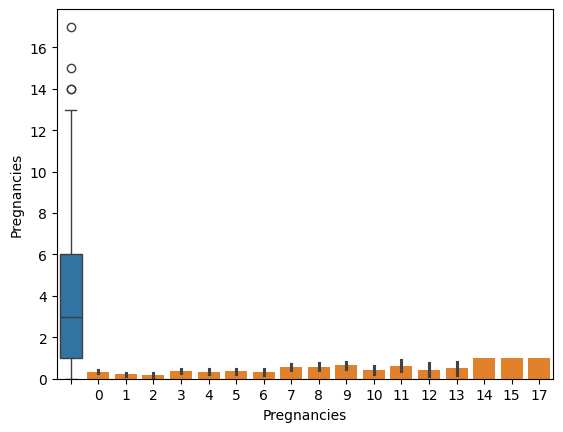

In [9]:
sns.boxplot(y=df['Pregnancies'])
sns.barplot(x='Pregnancies', y='Outcome', data=df)

In [10]:
features = ['Glucose', 'BloodPressure', 'BMI', 'Insulin', 'SkinThickness', 'DiabetesPedigreeFunction', 'Age']
for col in features:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  UB = Q3 + (1.5 * IQR)
  LB = Q1 - (1.5 * IQR)
  df = df[(df[col] >= LB ) & (df[col] <= UB)]

In [11]:
for col in df:
  fig = px.box(df[col],title = col)
  fig.update_layout(width = 700 , height = 700 )
  fig.show()

In [12]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [16]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,646.0,3.863777,3.353585,0.000,1.0000,3.000,6.000,17.000
Glucose,646.0,119.314241,29.187425,44.000,99.0000,114.000,137.000,198.000
BloodPressure,646.0,72.137771,11.329507,38.000,64.0000,72.000,80.000,106.000
SkinThickness,646.0,20.769350,15.307729,0.000,0.0000,23.000,32.000,60.000
Insulin,646.0,68.921053,83.587034,0.000,0.0000,41.500,121.500,330.000
BMI,646.0,32.041176,6.434638,18.200,27.3250,32.000,36.100,50.000
DiabetesPedigreeFunction,646.0,0.425661,0.244782,0.078,0.2395,0.357,0.583,1.162
Age,646.0,32.832817,11.146101,21.000,24.0000,29.000,40.000,66.000


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [22]:
x_scaled_df = pd.DataFrame(x_scaled , columns=x.columns)
x_scaled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.637490,0.983574,-0.012170,0.930359,-0.825181,0.242443,0.823163,1.541390
1,-0.854607,-1.176563,-0.542171,0.538096,-0.825181,-0.846263,-0.305247,-0.164563
2,1.234329,2.183650,-0.718838,-1.357840,-0.825181,-1.359509,1.007142,-0.074776
3,-0.854607,-1.039411,-0.542171,0.145833,0.300266,-0.612969,-1.057520,-1.062433
4,0.339071,-0.113638,0.164497,-1.357840,-0.825181,-1.001792,-0.918513,-0.254350
...,...,...,...,...,...,...,...,...
641,1.831168,-0.627957,0.341164,1.780261,1.329931,0.133572,-1.041166,2.708621
642,-0.556187,0.092089,-0.188837,0.407342,-0.825181,0.740137,-0.350220,-0.523711
643,0.339071,0.057801,-0.012170,0.145833,0.515778,-0.908474,-0.738622,-0.254350
644,-0.854607,0.229240,-1.072172,-1.357840,-0.825181,-0.301910,-0.313424,1.272029


In [24]:
x_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,646.0,-4.949601e-17,1.000775,-1.153026,-0.854607,-0.257768,0.637490,3.920104
Glucose,646.0,-4.124668e-17,1.000775,-2.582366,-0.696532,-0.182214,0.606407,2.697968
BloodPressure,646.0,-4.812112e-16,1.000775,-3.015508,-0.718838,-0.012170,0.694498,2.991169
SkinThickness,646.0,1.072414e-16,1.000775,-1.357840,-1.357840,0.145833,0.734227,2.564786
Insulin,646.0,-8.249335e-18,1.000775,-0.825181,-0.825181,-0.328308,0.629520,3.125859
BMI,646.0,-8.153093e-16,1.000775,-2.152709,-0.733504,-0.006404,0.631266,2.793124
DiabetesPedigreeFunction,646.0,-2.378558e-16,1.000775,-1.421391,-0.761108,-0.280716,0.643271,3.010478
Age,646.0,2.474801e-17,1.000775,-1.062433,-0.793072,-0.344137,0.643520,2.977982


# **RFE - Recursive Feature Elimination**

In [25]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression(max_iter=1000)
rfe = RFE(model , n_features_to_select=5)
rfe.fit(x_scaled_df,y)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5)

In [27]:
rfe.support_

array([ True,  True, False, False, False,  True,  True,  True])

In [28]:
selected_indexes = []
for i, data in enumerate(rfe.support_):
  if data == True:
    selected_indexes.append(i)

In [29]:
selected_indexes

[0, 1, 5, 6, 7]

In [31]:
dummy = x_scaled_df.iloc[:,selected_indexes]
dummy

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
0,0.637490,0.983574,0.242443,0.823163,1.541390
1,-0.854607,-1.176563,-0.846263,-0.305247,-0.164563
2,1.234329,2.183650,-1.359509,1.007142,-0.074776
3,-0.854607,-1.039411,-0.612969,-1.057520,-1.062433
4,0.339071,-0.113638,-1.001792,-0.918513,-0.254350
...,...,...,...,...,...
641,1.831168,-0.627957,0.133572,-1.041166,2.708621
642,-0.556187,0.092089,0.740137,-0.350220,-0.523711
643,0.339071,0.057801,-0.908474,-0.738622,-0.254350
644,-0.854607,0.229240,-0.301910,-0.313424,1.272029


In [32]:
new_x = dummy
new_x

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
0,0.637490,0.983574,0.242443,0.823163,1.541390
1,-0.854607,-1.176563,-0.846263,-0.305247,-0.164563
2,1.234329,2.183650,-1.359509,1.007142,-0.074776
3,-0.854607,-1.039411,-0.612969,-1.057520,-1.062433
4,0.339071,-0.113638,-1.001792,-0.918513,-0.254350
...,...,...,...,...,...
641,1.831168,-0.627957,0.133572,-1.041166,2.708621
642,-0.556187,0.092089,0.740137,-0.350220,-0.523711
643,0.339071,0.057801,-0.908474,-0.738622,-0.254350
644,-0.854607,0.229240,-0.301910,-0.313424,1.272029


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train ,y_test = train_test_split(new_x , y ,train_size= 0.8 , random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000 , random_state=42)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [36]:
y_pred = lr.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [37]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [38]:
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("Precision:", precision_score(y_test, y_pred)*100)
print("Recall:", recall_score(y_test, y_pred)*100)
print("F1 Score:", f1_score(y_test, y_pred)*100)

Accuracy: 74.61538461538461
Precision: 61.53846153846154
Recall: 41.02564102564102
F1 Score: 49.23076923076923


In [39]:
confusion_matrix(y_pred,y_test)

array([[81, 23],
       [10, 16]])

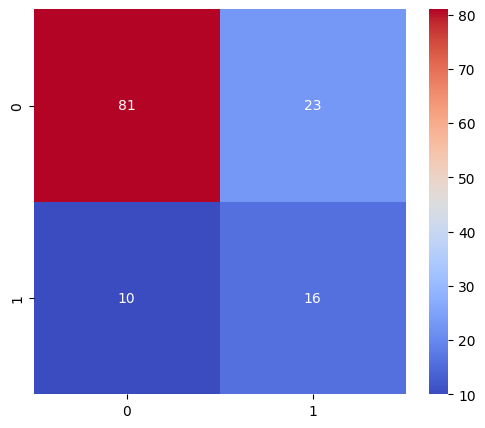

In [41]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_pred,y_test),annot = True, cmap="coolwarm" ,fmt ="d")
plt.show()

In [42]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba = lr.predict_proba(x_test)[:,1]
fpr,tpr ,_ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test , y_pred_proba)

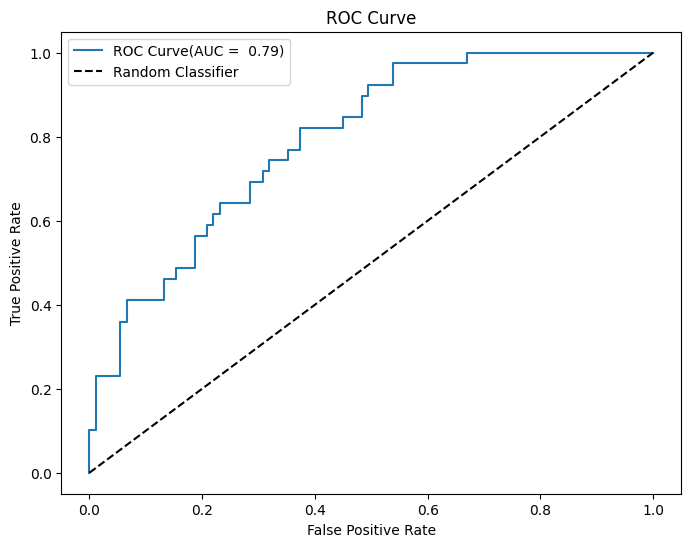

In [43]:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label = f'ROC Curve(AUC = {auc : .2f})')
plt.plot([0,1],[0,1],'k--',label="Random Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()

In [44]:
y.value_counts(normalize=True)


,proportion
Outcome,
0,0.682663
1,0.317337


#**🔄 What is SMOTE?**
## **SMOTE stands for Synthetic Minority Over-sampling Technique.**

🧠 It is a method to balance imbalanced datasets by creating synthetic samples of the minority class, instead of just duplicating existing ones.

For example:
If your dataset has:

Class 0 (non-diabetic): 500

Class 1 (diabetic): 150

Then SMOTE will generate synthetic class 1 samples so both classes have similar numbers. This helps prevent your model from being biased toward the majority class.

In [45]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 1: Split original dataset (optional before scaling)
X_train, X_test, y_train, y_test = train_test_split(x_scaled_df, y, test_size=0.2, random_state=42)

# Step 2: Apply SMOTE on scaled training data only
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [46]:
x_train, x_val, y_train, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [47]:
from sklearn.linear_model import LogisticRegression
nmodel = LogisticRegression(max_iter=1000 , random_state=42)
nmodel.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [49]:
y_pred = nmodel.predict(x_val)
y_proba = nmodel.predict_proba(x_val)[:, 1]  # for ROC curve

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

print("Accuracy:", accuracy_score(y_val, y_pred)*100)
print("Precision:", precision_score(y_val, y_pred)*100)
print("Recall:", recall_score(y_val, y_pred)*100)
print("F1 Score:", f1_score(y_val, y_pred)*100)

Accuracy: 75.0
Precision: 76.92307692307693
Recall: 71.42857142857143
F1 Score: 74.07407407407408


In [52]:
confusion_matrix(y_pred,y_val)

array([[55, 20],
       [15, 50]])

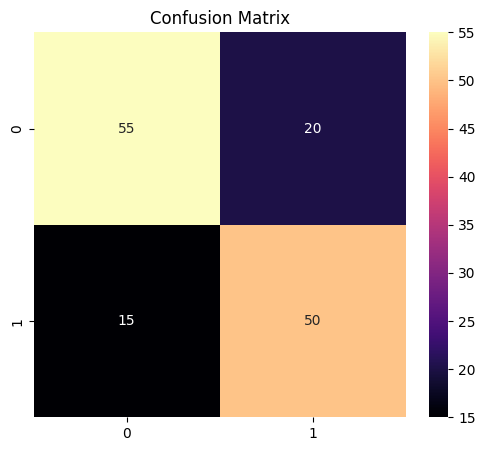

In [67]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_pred,y_val),annot = True , cmap ='magma' , fmt = 'd')
plt.title("Confusion Matrix")
plt.savefig('/content/confusion_matrix.png')
plt.show()

In [54]:
from sklearn.metrics import roc_auc_score , roc_curve

fpr,tpr,threshold = roc_curve(y_val,y_proba)
auc = roc_auc_score(y_val,y_proba)

/tmp/ipython-input-71-1906229742.py:3: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.



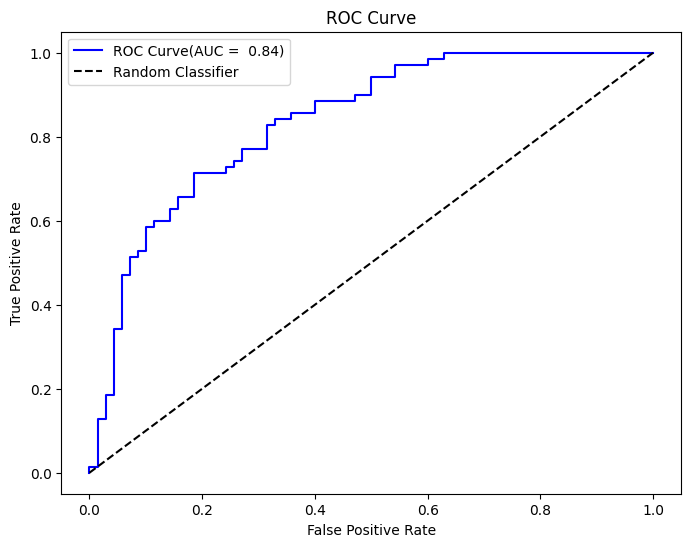

In [71]:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr, color='blue',label = f"ROC Curve(AUC = {auc : .2f})")
plt.plot([0,1],[0,1],'k--', color='black',label="Random Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.savefig("/content/roc_curve.png")
plt.show()

# **Class Distribution Plot**

/tmp/ipython-input-57-1701755688.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




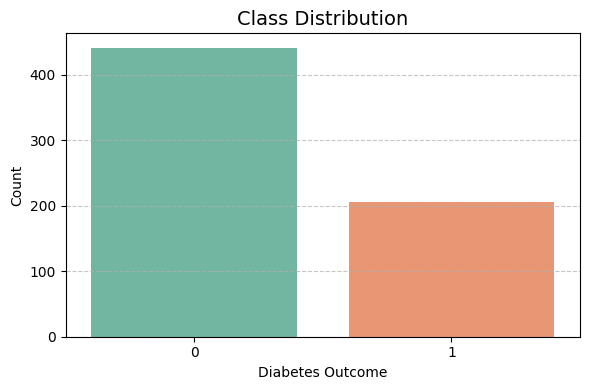

In [57]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Outcome', palette='Set2')
plt.title('Class Distribution', fontsize=14)
plt.xlabel('Diabetes Outcome')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('/content/class_distribution.png')
plt.show()

# **Feature Distribution Plot**

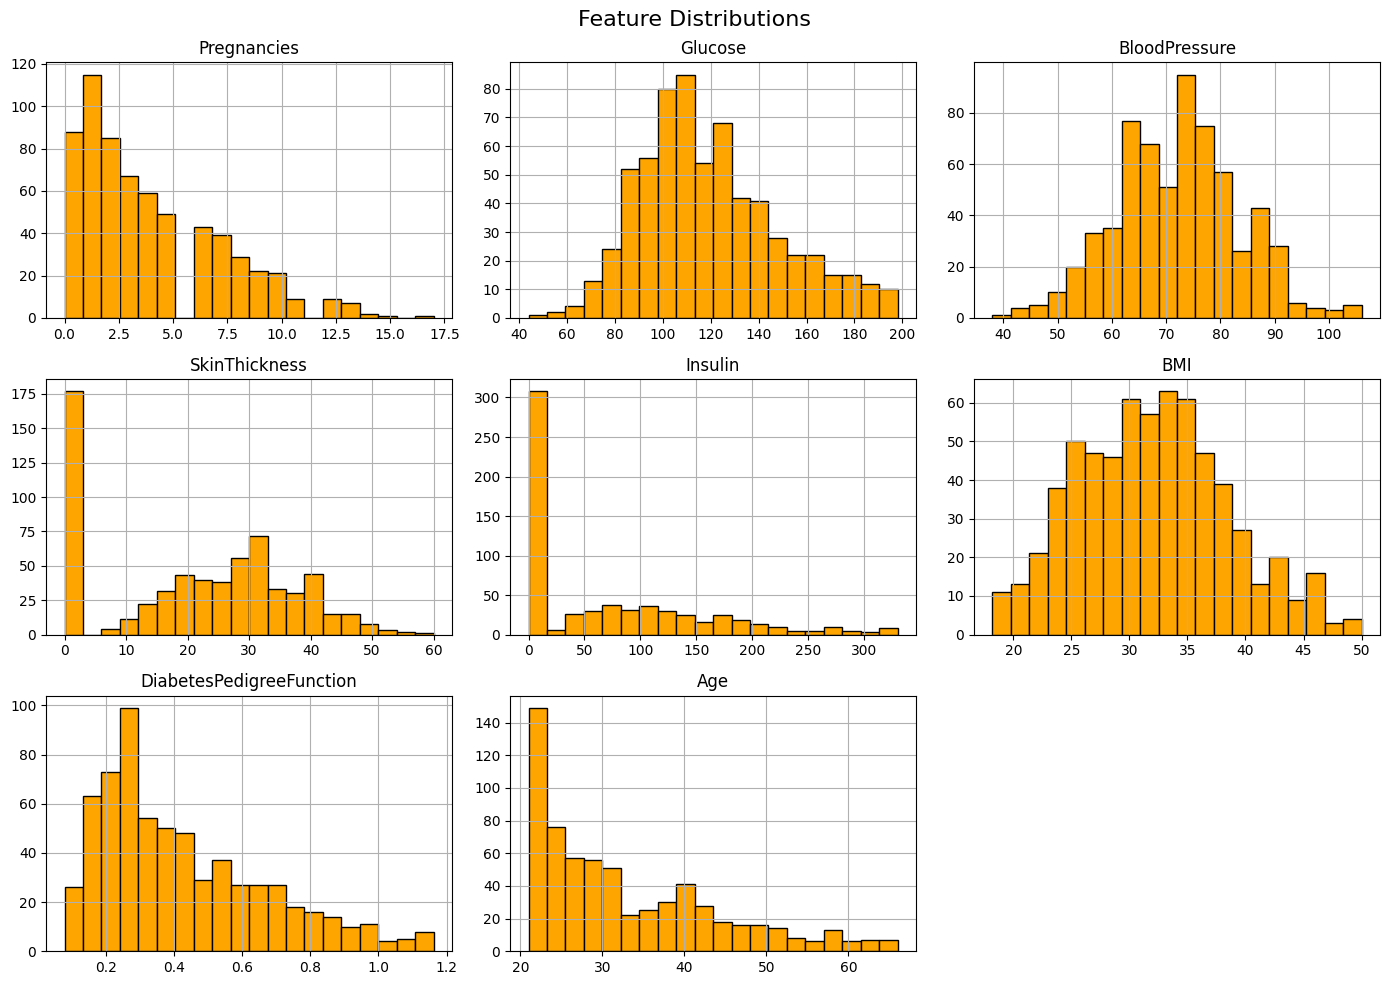

In [61]:
cols = df.columns[:-1]  # Exclude 'Outcome'
df[cols].hist(bins=20, figsize=(14, 10), color='orange', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.savefig("/content/feature_distribution.png")
plt.show()

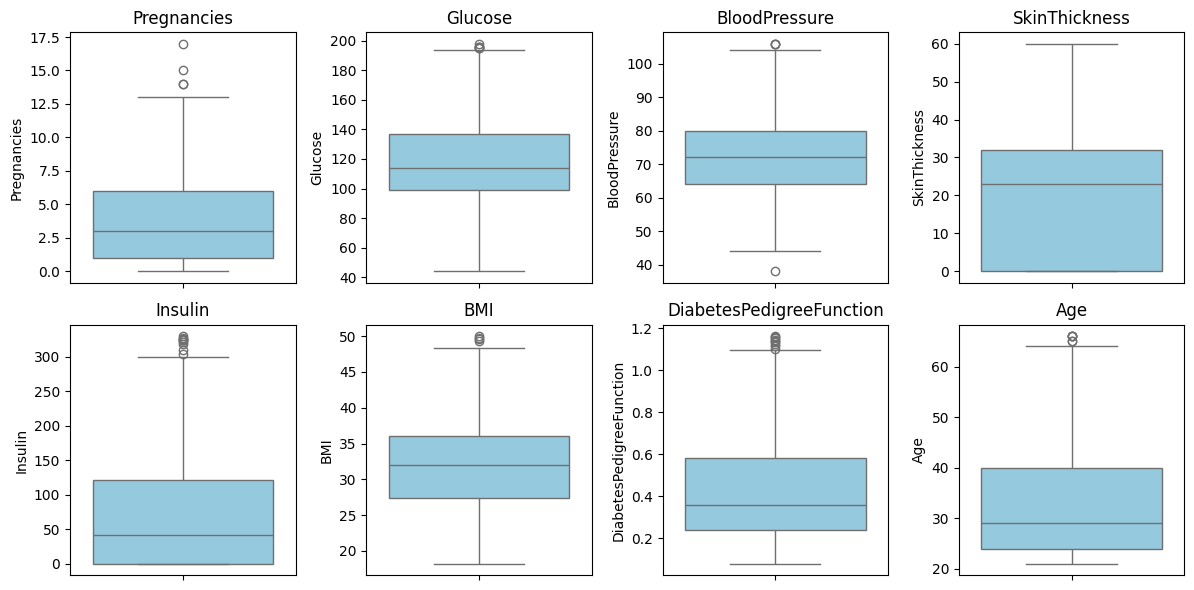

In [59]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(col)
plt.tight_layout()

plt.show()

# **Correlation Matrix Plot**

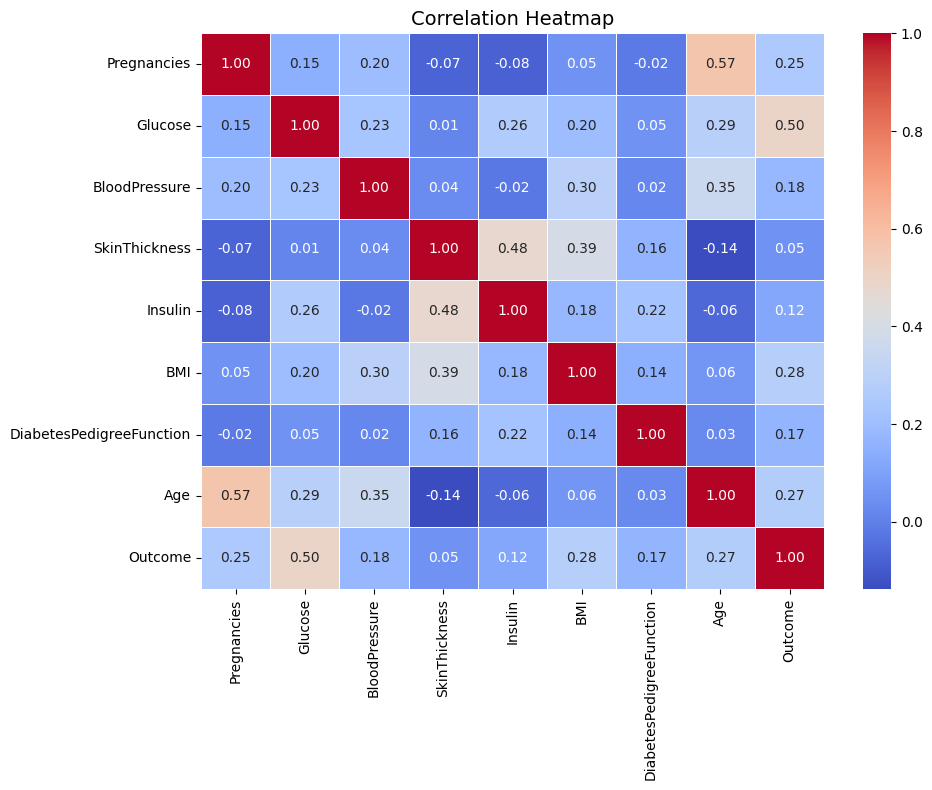

In [63]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.savefig('/content/correlation_matrix.png')
plt.show()

In [72]:
import pickle

# Save the model
with open('/content/diabetes_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save the scaler (very important for real-time inputs)
with open('/content/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)